In [104]:
import pandas as pd
import numpy as np
from category_encoders.target_encoder import TargetEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm , skew
from  scipy import stats
from scipy.special import boxcox
import os 
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import fbeta_score, recall_score, precision_score, average_precision_score, precision_recall_curve
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE ,ADASYN,BorderlineSMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns
from collections import Counter
from sklearn.metrics import make_scorer
from time import time
import lightgbm as light
import catboost as cat
import xgboost as xgb
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler 
import pandas as pd
import numpy as np
from category_encoders.target_encoder import TargetEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm , skew
from  scipy import stats
from scipy.special import boxcox
import os 
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import fbeta_score, recall_score, precision_score, average_precision_score, precision_recall_curve
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE ,ADASYN,BorderlineSMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns
from collections import Counter
from sklearn.metrics import make_scorer
from time import time
import lightgbm as light
import catboost as cat
import xgboost as xgb
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler 

import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
import warnings
from sklearn import model_selection
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score,KFold,TimeSeriesSplit,GridSearchCV
from sklearn.utils import resample
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor, 
                              RandomForestClassifier, RandomForestRegressor,AdaBoostClassifier) 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgbm
from sklearn.metrics import f1_score, confusion_matrix,roc_auc_score


# import data

In [70]:
submit = pd.read_csv('../../data/submission_test.csv')
train = pd.read_csv('../../data/train.csv')
test = pd.read_csv('../../data/test.csv')

## solve the index

In [71]:
train_index = pd.DataFrame(train['txkey'])
test_index = pd.DataFrame(test['txkey'])

## concat train test into data_all

In [72]:
data = pd.concat([train,test],axis=0,sort=False)

# preprocessing 

## fillna 

In [73]:
data['flbmk'].fillna('N', inplace=True)
data['flg_3dsmk'].fillna('N', inplace=True)

## cross feature

In [74]:
data['ecfg_stocn'] = data['ecfg'] + data['stocn'].astype('str')
data['ecfg_scity'] = data['ecfg'] + data['scity'].astype('str')

data['ovrlt_stocn'] = data['ovrlt'] + data['stocn'].astype('str')
data['ovrlt_scity'] = data['ovrlt'] + data['stocn'].astype('str')

## categroy to num

In [75]:
data['ecfg'] = data['ecfg'].astype('category').cat.codes
data['flbmk'] = data['flbmk'].astype('category').cat.codes
data['flg_3dsmk'] = data['flg_3dsmk'].astype('category').cat.codes
data['insfg'] = data['insfg'].astype('category').cat.codes
data['ovrlt'] = data['ovrlt'].astype('category').cat.codes
# #數值
data['acqic'] = data['acqic'].astype('category').cat.codes
data['bacno'] = data['bacno'].astype('category').cat.codes
data['cano'] = data['cano'].astype('category').cat.codes
data['csmcu'] = data['csmcu'].astype('category').cat.codes
data['hcefg'] = data['hcefg'].astype('category').cat.codes
data['mcc'] = data['mcc'].astype('category').cat.codes
data['mchno'] = data['mchno'].astype('category').cat.codes
data['scity'] = data['scity'].astype('category').cat.codes
data['stocn'] = data['stocn'].astype('category').cat.codes

## loctm data

In [76]:
data['loctm_int'] = data['loctm'].astype(int)
data['loctm_str'] = data['loctm_int'].astype(str)
data['loctm_str'] = data['loctm_str'].apply(lambda x : '0'+x if (len(x)==5) else ('00'+x if (len(x)==4) else ('000'+x if (len(x)==3) else ('0000'+x if (len(x)==2) else ('00000'+x if (len(x)==1) else x)))))
data['hours'] = data['loctm_str'].str[0:2]
data['minutes'] = data['loctm_str'].str[2:4]
data['seconds'] = data['loctm_str'].str[4:6]
data['hours'] = data['hours'].astype(int)
data['minutes'] = data['minutes'].astype(int)
data['seconds'] = data['seconds'].astype(int)
data['total_seconds'] = data['locdt']*86400+data['hours']*3600+data['minutes']*60+data['seconds']
data['time'] = (data['hours']*3600+data['minutes']*60+data['seconds'])#/86400

data['trad_hour'] = data['loctm'] // 10000

data['morning'] = ((data['trad_hour'] < 12) & (data['trad_hour'] >=6)).replace([True,False],[1,0])
data['afternoon'] = ((data['trad_hour'] < 18) & (data['trad_hour'] >=12)).replace([True,False],[1,0])
data['night'] = ((data['trad_hour'] < 24) & (data['trad_hour'] >=18)).replace([True,False],[1,0])
data['midnight'] = ((data['trad_hour'] < 6) & (data['trad_hour'] >=0)).replace([True,False],[1,0])

## account data

In [77]:
transation_count = data.groupby(['bacno'])['cano'].count().rename("transation_count").reset_index()
data = data.merge(transation_count,how='left')

transation_count_cano = data.groupby(['bacno','cano'])['cano'].count().rename("transation_count_cano").reset_index()
data = data.merge(transation_count_cano,how='left')

acqic_duplicated_count = data.groupby(['bacno','acqic'])['acqic'].count().rename("acqic_duplicated_count").reset_index()
data = data.merge(acqic_duplicated_count,how='left')

conam_duplicated_count = data.groupby(['bacno','conam'])['conam'].count().rename("conam_duplicated_count").reset_index()
data = data.merge(conam_duplicated_count,how='left')

conam_stocn = data.groupby(['csmcu','stocn'])['stocn'].count().rename("conam_stocn").reset_index()
data = data.merge(conam_stocn, on=['csmcu', 'stocn'])

bacno_mchno = data.groupby(['bacno','mchno'])['mchno'].count().rename("bacno_mchno").reset_index()
data = data.merge(bacno_mchno, on=['bacno', 'mchno'])

cano_mchno = data.groupby(['cano','mchno'])['mchno'].count().rename("cano_mchno").reset_index()
data = data.merge(cano_mchno, on=['cano', 'mchno'])

bacno_stocn = data.groupby(['bacno','stocn'])['stocn'].count().rename("bacno_stocn").reset_index()
data = data.merge(bacno_stocn, on=['bacno', 'stocn'])

cano_stocn = data.groupby(['cano','stocn'])['stocn'].count().rename("cano_stocn").reset_index()
data = data.merge(cano_stocn, on=['cano', 'stocn'])

bacno_scity = data.groupby(['bacno','scity'])['scity'].count().rename("bacno_scity").reset_index()
data = data.merge(bacno_scity, on=['bacno', 'scity'])

cano_scity = data.groupby(['cano','scity'])['scity'].count().rename("cano_scity").reset_index()
data = data.merge(cano_scity, on=['cano', 'scity'])


bacno_flg_3dsmk = data.groupby(['bacno','flg_3dsmk'])['flg_3dsmk'].count().rename("bacno_flg_3dsmk").reset_index()
data = data.merge(bacno_flg_3dsmk, on=['bacno', 'flg_3dsmk'])

cano_flg_3dsmk = data.groupby(['cano','flg_3dsmk'])['flg_3dsmk'].count().rename("cano_flg_3dsmk").reset_index()
data = data.merge(cano_flg_3dsmk, on=['cano', 'flg_3dsmk'])


bacno_ecfg_mean = data.groupby(['bacno'])['ecfg'].mean().rename("bacno_ecfg_mean").reset_index()
data = data.merge(bacno_ecfg_mean, on=['bacno'])

cano_ecfg_mean = data.groupby(['cano'])['ecfg'].mean().rename("cano_ecfg_mean").reset_index()
data = data.merge(cano_ecfg_mean, on=['cano'])

grp = data.groupby(['bacno'])['conam'].min().rename("comsum_min").reset_index()
data = data.merge(grp,how='left')

grp = data.groupby(['bacno'])['conam'].max().rename('comsum_max').reset_index()
data = data.merge(grp,how='left')

grp = (data.groupby(['bacno'])['txkey'].count() / data['locdt'].max()).reset_index().rename(columns={'txkey':'acc_trad_ave'})
data = data.merge(grp,how='left')

grp = data.groupby(['bacno'])['txkey'].count().reset_index().rename(columns={'txkey':'acc_trad_total'})
data = data.merge(grp,how='left')

grp = data.groupby(['bacno'])['conam'].sum().reset_index().rename(columns={'conam':'comsum_total'})
data = data.merge(grp,how='left')

grp = data.groupby(['bacno'])['conam'].mean().reset_index().rename(columns={'conam':'comsum_ave'})
data = data.merge(grp,how='left')

mean_amount = data.groupby(['bacno'])['conam'].mean().rename("mean_amount").reset_index()
data = data.merge(mean_amount,how='left')

data['amtby_mean_amount'] = data['conam'] / data['mean_amount']
data['amtby_mean_amount'] = data['amtby_mean_amount'].fillna(0)

mean_amount_cano = data.groupby(['bacno','cano'])['conam'].mean().rename("mean_amount_cano").reset_index()
data = data.merge(mean_amount_cano,how='left')

data['amtby_mean_amount_cano'] = data['conam'] / data['mean_amount_cano']
data['amtby_mean_amount_cano'] = data['amtby_mean_amount_cano'].fillna(0)


median_amount = data.groupby(['bacno'])['conam'].median().rename("median_amount").reset_index()
data = data.merge(median_amount,how='left')

data['amtby_median_amount'] = data['conam'] / data['median_amount']
data['amtby_median_amount'] = data['amtby_median_amount'].fillna(0)

median_amount_cano = data.groupby(['bacno','cano'])['conam'].median().rename("median_amount_cano").reset_index()
data = data.merge(median_amount_cano,how='left')

data['amtby_median_amount_cano'] = data['conam'] / data['median_amount_cano']
data['amtby_median_amount_cano'] = data['amtby_median_amount_cano'].fillna(0)

std_amount = data.groupby(['bacno'])['conam'].std().rename("std_amount").reset_index()
data = data.merge(std_amount,how='left')

## time series

In [78]:
day30 = data[data['locdt'] <= 30]
grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq30'})
data = data.merge(grp,how='left')
data['comsum_feq30'].fillna(0,inplace=True)

day30 = data[(data['locdt'] <= 60) & (data['locdt'] >30 ) ]
grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq3060'})
data = data.merge(grp,how='left')
data['comsum_feq3060'].fillna(0,inplace=True)

day30 = data[(data['locdt'] <= 90) & (data['locdt'] >60 ) ]
grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq6090'})
data = data.merge(grp,how='left')
data['comsum_feq6090'].fillna(0,inplace=True)

day30 = data[(data['locdt'] <= 120) & (data['locdt'] >90 ) ]
grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq90120'})
data = data.merge(grp,how='left')
data['comsum_feq90120'].fillna(0,inplace=True)

day60 = data[data['locdt'] <= 60]
grp = (day60.groupby(['bacno'])['txkey'].count() / 60).reset_index().rename(columns={'txkey':'comsum_feq60'})
data = data.merge(grp,how='left')
data['comsum_feq60'].fillna(0,inplace=True)

day60 = data[(data['locdt'] <= 90) & (data['locdt'] >30 ) ]
grp = (day60.groupby(['bacno'])['txkey'].count() / 60).reset_index().rename(columns={'txkey':'comsum_feq3090'})
data = data.merge(grp,how='left')
data['comsum_feq3090'].fillna(0,inplace=True)

day60 = data[(data['locdt'] <= 120) & (data['locdt'] >60 ) ]
grp = (day60.groupby(['bacno'])['txkey'].count() / 60).reset_index().rename(columns={'txkey':'comsum_feq60120'})
data = data.merge(grp,how='left')
data['comsum_feq60120'].fillna(0,inplace=True)

grp = data.groupby(['locdt'])['bacno'].count().reset_index().rename(columns={'bacno':'day_trad_num'})
data = data.merge(grp,how='left')

grp = data.groupby(['locdt'])['conam'].sum().reset_index().rename(columns={'conam':'day_comsum_total'})
data = data.merge(grp,how='left')


frequency = ((data.groupby(['bacno'])['locdt'].max()-data.groupby(['bacno'])['locdt'].min())/data.groupby(['bacno'])['locdt'].count()).rename("frequency").reset_index()
data = data.merge(frequency,how='left')

frequency_cano = ((data.groupby(['bacno','cano'])['locdt'].max()-data.groupby(['bacno','cano'])['locdt'].min())/data.groupby(['bacno','cano'])['locdt'].count()).rename("frequency_cano").reset_index()
data = data.merge(frequency_cano,how='left')

mean_time = data.groupby(['bacno'])['time'].mean().rename("mean_time").reset_index()
data = data.merge(mean_time,how='left')

median_time = data.groupby(['bacno'])['time'].median().rename("median_time").reset_index()
data = data.merge(median_time,how='left')


mean_time_cano = data.groupby(['bacno','cano'])['time'].mean().rename("mean_time_cano").reset_index()
data = data.merge(mean_time_cano,how='left')

median_time_cano = data.groupby(['bacno','cano'])['time'].median().rename("median_time_cano").reset_index()
data = data.merge(median_time_cano,how='left')

data = data.sort_values(by = ['total_seconds'])
data['total_seconds_diff'] = data.groupby(['bacno'])['total_seconds'].diff()
data['total_seconds_diff'] = data['total_seconds_diff'].fillna(0)

data = data.sort_values(by = ['total_seconds'])
data['total_seconds_diff_cano'] = data.groupby(['bacno','cano'])['total_seconds'].diff()
data['total_seconds_diff_cano'] = data['total_seconds_diff_cano'].fillna(0)


data['date_day'] = data['locdt'] % 30

data['week'] = data['locdt'] % 7

data['2_week'] = data['locdt'] % 14

data['month'] = data['locdt'] % 30

## country data

In [79]:
data['is_taiwan'] = (data['stocn'] == 102).replace([True,False],[1,0])

grp = data.groupby(['stocn'])['txkey'].count().reset_index().rename(columns={'txkey':'country_com_num'})
data = data.merge(grp,how='left')

grp = data.groupby(['scity'])['txkey'].count().reset_index().rename(columns={'txkey':'city_com_num'})
data = data.merge(grp,how='left')

## target encoding

In [80]:
object_list = []
for col in data.columns.tolist():
    if data[col].dtype == 'object':
        object_list.append(col)
        
nd_tar_list = []
for col in object_list:

    if len(data[col].unique()) < 5:
        nd_ont_list.append(col)
    else:
        nd_tar_list.append(col)

In [87]:
train = data.merge(train_index)
test = data.merge(test_index)

In [88]:
train_tar = train[train['locdt'] > 30]

tar = TargetEncoder(smoothing=0.9).fit(train_tar[nd_tar_list],train_tar['fraud_ind'])
test[nd_tar_list] = tar.transform(test[nd_tar_list])
train[nd_tar_list] = tar.transform(train[nd_tar_list])

## check train test shape

In [90]:
test.drop('fraud_ind',axis=1,inplace=True)
print(train.shape,test.shape)

(1521787, 93) (421665, 92)


# build model

In [100]:
lig_model = light.LGBMClassifier(
    n_estimators=700,reg_alpha=0.3,num_leaves=200,learning_rate=0.1,reg_lambda=0.5,subsample=0.7,is_unbalance=True)

In [101]:
X_train , X_valid , y_train ,y_valid = train_test_split(
    train.drop(['cano','bacno','fraud_ind','txkey'],axis=1),train['fraud_ind'],test_size=0.25,random_state =1102)

In [102]:
def cus_f1(ytru, ypre):
    threshold = 0.5
    y_pre = [int(item > threshold) for item in ypre]
    f1 = f1_score(ytru, y_pre, average='macro')
    return 'f1', f1, True

In [105]:
clf = lig_model.fit(X_train,y_train
                    ,eval_set=[(X_train, y_train),(X_valid,y_valid)],
                            eval_metric=cus_f1,
                            early_stopping_rounds=100)

[1]	training's binary_logloss: 0.0862843	training's f1: 0.74053	valid_1's binary_logloss: 0.0879919	valid_1's f1: 0.734075
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_logloss: 0.0822914	training's f1: 0.740006	valid_1's binary_logloss: 0.0845979	valid_1's f1: 0.733073
[3]	training's binary_logloss: 0.0773232	training's f1: 0.740433	valid_1's binary_logloss: 0.0799923	valid_1's f1: 0.733299
[4]	training's binary_logloss: 0.0738258	training's f1: 0.741321	valid_1's binary_logloss: 0.0766869	valid_1's f1: 0.734113
[5]	training's binary_logloss: 0.0701704	training's f1: 0.743606	valid_1's binary_logloss: 0.0732562	valid_1's f1: 0.736765
[6]	training's binary_logloss: 0.0669741	training's f1: 0.746276	valid_1's binary_logloss: 0.0702328	valid_1's f1: 0.7393
[7]	training's binary_logloss: 0.0641507	training's f1: 0.749232	valid_1's binary_logloss: 0.0675387	valid_1's f1: 0.741766
[8]	training's binary_logloss: 0.0615515	training's f1: 0.752509	valid_1

[67]	training's binary_logloss: 0.013831	training's f1: 0.914164	valid_1's binary_logloss: 0.0213764	valid_1's f1: 0.883421
[68]	training's binary_logloss: 0.0135825	training's f1: 0.915608	valid_1's binary_logloss: 0.0211773	valid_1's f1: 0.884059
[69]	training's binary_logloss: 0.0133042	training's f1: 0.91698	valid_1's binary_logloss: 0.0209701	valid_1's f1: 0.884927
[70]	training's binary_logloss: 0.013048	training's f1: 0.918571	valid_1's binary_logloss: 0.0207648	valid_1's f1: 0.886422
[71]	training's binary_logloss: 0.0128093	training's f1: 0.920056	valid_1's binary_logloss: 0.0205833	valid_1's f1: 0.887493
[72]	training's binary_logloss: 0.0125994	training's f1: 0.921052	valid_1's binary_logloss: 0.0204155	valid_1's f1: 0.888115
[73]	training's binary_logloss: 0.0123913	training's f1: 0.922088	valid_1's binary_logloss: 0.0202417	valid_1's f1: 0.888887
[74]	training's binary_logloss: 0.0121515	training's f1: 0.923321	valid_1's binary_logloss: 0.0200447	valid_1's f1: 0.889518
[75

[133]	training's binary_logloss: 0.00492632	training's f1: 0.970594	valid_1's binary_logloss: 0.0148595	valid_1's f1: 0.917444
[134]	training's binary_logloss: 0.00486274	training's f1: 0.971006	valid_1's binary_logloss: 0.0148282	valid_1's f1: 0.917819
[135]	training's binary_logloss: 0.00480533	training's f1: 0.971464	valid_1's binary_logloss: 0.014793	valid_1's f1: 0.917842
[136]	training's binary_logloss: 0.00475514	training's f1: 0.971922	valid_1's binary_logloss: 0.0147656	valid_1's f1: 0.918129
[137]	training's binary_logloss: 0.00467471	training's f1: 0.972515	valid_1's binary_logloss: 0.0147058	valid_1's f1: 0.91812
[138]	training's binary_logloss: 0.00460474	training's f1: 0.972812	valid_1's binary_logloss: 0.0146624	valid_1's f1: 0.918657
[139]	training's binary_logloss: 0.00455326	training's f1: 0.973184	valid_1's binary_logloss: 0.0146344	valid_1's f1: 0.918699
[140]	training's binary_logloss: 0.00449239	training's f1: 0.973437	valid_1's binary_logloss: 0.0145846	valid_1's

[198]	training's binary_logloss: 0.00210882	training's f1: 0.992798	valid_1's binary_logloss: 0.0132223	valid_1's f1: 0.928385
[199]	training's binary_logloss: 0.00207784	training's f1: 0.992975	valid_1's binary_logloss: 0.0132092	valid_1's f1: 0.928292
[200]	training's binary_logloss: 0.00205422	training's f1: 0.993168	valid_1's binary_logloss: 0.013202	valid_1's f1: 0.928477
[201]	training's binary_logloss: 0.00202654	training's f1: 0.99333	valid_1's binary_logloss: 0.0131907	valid_1's f1: 0.928491
[202]	training's binary_logloss: 0.00199742	training's f1: 0.99341	valid_1's binary_logloss: 0.0131744	valid_1's f1: 0.928479
[203]	training's binary_logloss: 0.00197093	training's f1: 0.993556	valid_1's binary_logloss: 0.01315	valid_1's f1: 0.9286
[204]	training's binary_logloss: 0.00195258	training's f1: 0.993685	valid_1's binary_logloss: 0.013145	valid_1's f1: 0.928639
[205]	training's binary_logloss: 0.00192443	training's f1: 0.993927	valid_1's binary_logloss: 0.0131273	valid_1's f1: 0

[263]	training's binary_logloss: 0.00094747	training's f1: 0.998843	valid_1's binary_logloss: 0.0126398	valid_1's f1: 0.932745
[264]	training's binary_logloss: 0.000936202	training's f1: 0.99886	valid_1's binary_logloss: 0.0126304	valid_1's f1: 0.932855
[265]	training's binary_logloss: 0.000925893	training's f1: 0.998909	valid_1's binary_logloss: 0.0126225	valid_1's f1: 0.933412
[266]	training's binary_logloss: 0.000916397	training's f1: 0.998992	valid_1's binary_logloss: 0.0126143	valid_1's f1: 0.93333
[267]	training's binary_logloss: 0.000906848	training's f1: 0.999041	valid_1's binary_logloss: 0.0126146	valid_1's f1: 0.933494
[268]	training's binary_logloss: 0.000896098	training's f1: 0.999041	valid_1's binary_logloss: 0.0126038	valid_1's f1: 0.933823
[269]	training's binary_logloss: 0.000887163	training's f1: 0.999074	valid_1's binary_logloss: 0.0126098	valid_1's f1: 0.933699
[270]	training's binary_logloss: 0.000876888	training's f1: 0.999091	valid_1's binary_logloss: 0.0126045	va

[328]	training's binary_logloss: 0.000471538	training's f1: 0.999901	valid_1's binary_logloss: 0.0124761	valid_1's f1: 0.936428
[329]	training's binary_logloss: 0.000466736	training's f1: 0.999901	valid_1's binary_logloss: 0.0124722	valid_1's f1: 0.93647
[330]	training's binary_logloss: 0.000462594	training's f1: 0.999901	valid_1's binary_logloss: 0.0124696	valid_1's f1: 0.936607
[331]	training's binary_logloss: 0.000458273	training's f1: 0.999901	valid_1's binary_logloss: 0.0124701	valid_1's f1: 0.936649
[332]	training's binary_logloss: 0.000453571	training's f1: 0.999934	valid_1's binary_logloss: 0.0124652	valid_1's f1: 0.936554
[333]	training's binary_logloss: 0.000449099	training's f1: 0.999934	valid_1's binary_logloss: 0.0124617	valid_1's f1: 0.936649
[334]	training's binary_logloss: 0.000444848	training's f1: 0.99995	valid_1's binary_logloss: 0.0124634	valid_1's f1: 0.936691
[335]	training's binary_logloss: 0.000440864	training's f1: 0.999967	valid_1's binary_logloss: 0.0124668	v

[396]	training's binary_logloss: 0.000262177	training's f1: 1	valid_1's binary_logloss: 0.0124841	valid_1's f1: 0.938522
[397]	training's binary_logloss: 0.000260115	training's f1: 1	valid_1's binary_logloss: 0.0124822	valid_1's f1: 0.938575
[398]	training's binary_logloss: 0.000258357	training's f1: 1	valid_1's binary_logloss: 0.0124888	valid_1's f1: 0.938618
[399]	training's binary_logloss: 0.000256491	training's f1: 1	valid_1's binary_logloss: 0.0124925	valid_1's f1: 0.938671
[400]	training's binary_logloss: 0.000254651	training's f1: 1	valid_1's binary_logloss: 0.0124891	valid_1's f1: 0.938618
[401]	training's binary_logloss: 0.000252715	training's f1: 1	valid_1's binary_logloss: 0.0124924	valid_1's f1: 0.938618
[402]	training's binary_logloss: 0.000250968	training's f1: 1	valid_1's binary_logloss: 0.012494	valid_1's f1: 0.938744
[403]	training's binary_logloss: 0.000249144	training's f1: 1	valid_1's binary_logloss: 0.012497	valid_1's f1: 0.938648
[404]	training's binary_logloss: 0

fbeta score_train: 1.0
recall_score_train: 1.0
precision_score_train: 1.0
fbeta score: 0.9022556390977443
recall_score: 0.9207039746885505
precision_score: 0.8353067814854682

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    375390
         1.0       0.84      0.92      0.88      5057

    accuracy                           1.00    380447
   macro avg       0.92      0.96      0.94    380447
weighted avg       1.00      1.00      1.00    380447



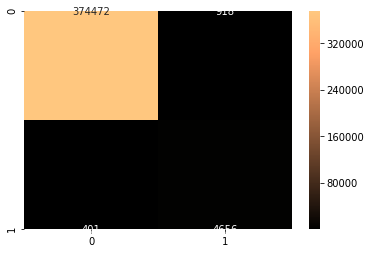

In [106]:
results = {}
results['ad'] = {}

pre_train = clf.predict(X_train)
pre_test = clf.predict(X_valid)

results['ad']['fbeta_train'] = fbeta_score(y_train, pre_train, beta=2)
results['ad']['recall_train'] = recall_score(y_train, pre_train)
results['ad']['precision_train'] = precision_score(y_train, pre_train)

results['ad']['fbeta_test'] = fbeta_score(y_valid, pre_test, beta=2)
results['ad']['recall_test'] = recall_score(y_valid, pre_test)
results['ad']['precision_test'] = precision_score(y_valid, pre_test)

print("fbeta score_train:", results['ad']['fbeta_train'])
print('recall_score_train:', results['ad']['recall_train'])
print('precision_score_train:', results['ad']['precision_train'])

print('========================================================')
print("fbeta score:", results['ad']['fbeta_test'])
print('recall_score:', results['ad']['recall_test'])
print('precision_score:', results['ad']['precision_test'])

# Classification report
print('\nClassification report:\n')
print(classification_report(y_valid, pre_test))

conf_matrix = confusion_matrix(y_valid, pre_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()

In [123]:
ypre = clf.predict(test.drop(['cano','bacno','txkey'],axis=1)) 
yh = clf.predict(test.drop(['cano','bacno','txkey'],axis=1),raw_score=True) 
yh = (yh > 2) * 1

In [124]:
ypre = pd.DataFrame(ypre,index=test.index) 
ypre = pd.concat([ypre,test['txkey']],axis=1) 
b = submit.merge(ypre)
yh = pd.DataFrame(yh,index=test.index) 
yh = pd.concat([yh,test['txkey']],axis=1) 
c = submit.merge(yh)

In [125]:
b[0].sum()

15574.0

In [126]:
c[0].sum()

8892

In [133]:
b = submit.merge(ypre)
b['fraud_ind'] = b[0]
b.drop(0,axis=1,inplace=True)
b.to_csv('test14.csv')

In [ ]:
c = submit.merge(yh)
c['fraud_ind'] = c[0]
c.drop(0,axis=1,inplace=True)
c.to_csv('test15.csv')

In [138]:
imp = clf.feature_importances_
imp_col = X_train.columns.tolist()
importance = pd.DataFrame(imp,index=imp_col)
importance.sort_values(0,ascending=False)

,0
frequency_cano,2402
loctm_str,2121
seconds,2024
total_seconds,1952
std_amount,1839
...,...
night,0
trad_hour,0
ovrlt_scity,0
loctm_int,0
